In [22]:
import numpy as np  
import matplotlib.pyplot as plt

In [23]:
np.random.seed(42)
data = np.random.rand(200, 3)

In [24]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [25]:
def initialize_grid(x, y, input_dim):
    return np.random.rand(x, y, input_dim)

In [26]:
def BMU(weights, input_vec): 
    min_dist = float('inf')
    bmu_idx = None   
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):  
            dist = euclidean_distance(input_vec, weights[i, j])
            if dist < min_dist:
                min_dist = dist
                bmu_idx = (i, j)
    return bmu_idx

In [ ]:
def gaussian_neighborhood(distance, radius):
    return np.exp(-(distance ** 2) / (2 * (radius ** 2)))

In [28]:
def update_weights(weights, input_vec, bmu_idx, learning_rate, radius):
    grid_x, grid_y = weights.shape[:2]
    for i in range(grid_x):
        for j in range(grid_y):  
            dist_to_bmu = euclidean_distance(np.array([i, j]), np.array(bmu_idx))
            if dist_to_bmu <= radius: 
                influence = gaussian_neighborhood(dist_to_bmu, radius)
                weights[i, j] += learning_rate * influence * (input_vec - weights[i, j]) 

In [29]:
def train_SOM(data, grid_x, grid_y, input_dim, epochs, start_lr, start_radius):
    weights = initialize_grid(grid_x, grid_y, input_dim)
    time_const_for_radius_decay = epochs / np.log(start_radius)
    
    for epoch in range(epochs):
        lr = start_lr * np.exp(-epoch / epochs) 
        radius = start_radius * np.exp(-epoch / time_const_for_radius_decay)   
        np.random.shuffle(data) 
    
    # for each neuron's input vec(size 3) in grid, find BMU  
    for input_vec in data:
        bmu_idx = BMU(weights, input_vec)
        update_weights(weights, input_vec, bmu_idx, lr, radius)
    return weights

In [30]:
def map_to_grid(data, weights):
    return [BMU(weights, vec) for vec in data]

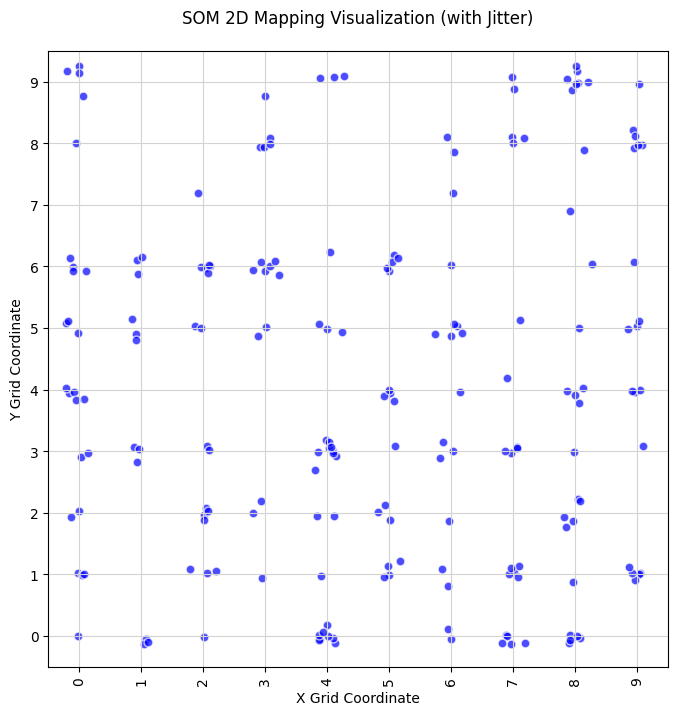

In [31]:
grid_x = grid_y = 10 
epochs = 100 
initial_lr = 0.5  
initial_radius = max(grid_x, grid_y) / 2 

weights = train_SOM(data, grid_x, grid_y, 3, epochs, initial_lr, initial_radius)
mapped = map_to_grid(data, weights)

x = [i + np.random.normal(0, 0.1) for i, j in mapped]
y = [j + np.random.normal(0, 0.1) for i, j in mapped]

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.7, c='blue', s=40, edgecolors='white')
plt.xticks(np.arange(grid_x), rotation=90)
plt.yticks(np.arange(grid_y))
plt.xlim(-0.5, grid_x-0.5)
plt.ylim(-0.5, grid_y-0.5)
plt.grid(True, which='both', color='lightgray', linestyle='-')
plt.title("SOM 2D Mapping Visualization (with Jitter)", pad=20)
plt.xlabel("X Grid Coordinate")
plt.ylabel("Y Grid Coordinate")
plt.show()